get test/train data 

In [2]:

############Adjustments##############

#options
PATH_DI06C001 = '/media/sf_SF/Stage2021/targetedQE/' 

## Adjustments
path = PATH_DI06C001

filename_Y_labels = 'total_y_matrix_with_label.txt'

########################



# load libraries
import pandas as pd
import os
import random
from PIL import Image
import numpy as np


#set paths
path_data_in = path + 'data/input/' + 'MachineLearning/'
path_data_out = path + 'data/output/' + 'MachineLearning/'
path_data_X = path_data_in + 'Xarrays/' #png's
path_data_y = path_data_in + 'Yarrays/' #labels



## Y
#load all Y labels together
filename = path_data_y + filename_Y_labels
# print(filename)

y = pd.read_csv(filename, sep='\t')



## X
#list all X files and devide in train OR test folder
filenames_X_train = []
filenames_X_test = []
directory_list = os.listdir(path_data_X)
# print(directory_list)

#random order list with filenames
random.shuffle(directory_list)

i = 0
for filename in directory_list:
    #print (filename) #all files, folders
    #print (i)
    if ".png" in filename:
        #print (filename)
        if i % 3 == 0: 
            #1/3th of data is test set, rest in train
            #print(i)
            filenames_X_test.append(path_data_X + filename)
        else:
            filenames_X_train.append(path_data_X + filename)
        i = i + 1
        
 #check ok? 70-30 devide train - test? ok     
print(len(filenames_X_train))
print(len(filenames_X_test))


## load X data + Merge per train/test X's with Y to S1
#keep only non unique values


def load_X_if_matched_in_y(filenames_list, y):
    all_images_as_array=[]
    label=[]    
    # match = 0
    # no_match = 0
    for filename in filenames_list:
        #print(filename)
        #filename = filenames_X_train[3]
        filename_wopath = filename.split('Xarrays/')[1]
        #filename_wopath = filename_wopath[:-4] #wo .png todo, see same x/y !!!
        # print(filename_wopath)
    
        matching_y = y[y.png==filename_wopath]
        if len(matching_y) == 1:
            label.append(matching_y.iloc[0,2]) #1st elem contains string NF/FOUND
            
            #load figure correctly as array [[], [], []]]
            img=Image.open(filename)
            np_array = np.asarray(img)
            l,b,c = np_array.shape    
            np_array = np_array.reshape(l*b*c,)   
            all_images_as_array.append(np_array)
            # match = match + 1
            
        if len(matching_y) != 1:
            # print("no or multiple match(es) in y found for: " + filename)
            # no_match = no_match + 1
            continue

    return np.array(all_images_as_array), np.array(label)
    

#if re.match(filename_wopath, y.Name[0]): #todo search in volled colom, ev niet via regress want wo .png moet volled zelfde
        


X_train,y_train = load_X_if_matched_in_y(filenames_X_train, y)
X_test, y_test = load_X_if_matched_in_y(filenames_X_test, y)


# print(X_train)
# print(len(y_train))
# print(X_test)
# print(len(y_test))



3406
1704


create models

CNN

In [3]:
%matplotlib inline
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

import matplotlib.image as mpimg
from skimage.io import imread, imshow
from skimage import data, color, io, filters, morphology,transform, exposure, feature, util
from scipy import ndimage
import tensorflow as tf
#importeer Tensorflow namespaces
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
#K.set_image_dim_ordering('tf')

###### Voor Tensorflow-GPU ########

#physical_devices = tf.config.experimental.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [5]:
# Reshape
X_train = X_train.reshape((len(X_train),128, 128,1))
X_test = X_test.reshape((len(X_test),128, 128,1)) 

print(X_train)

X_train = X_train/255
X_test = X_test/255

print(X_train)

[[[[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  ...

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]]


 [[[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  ...

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]]


 [[[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  ...

  [[255]
   [255]
   [255]
   

/usr/local/lib64/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


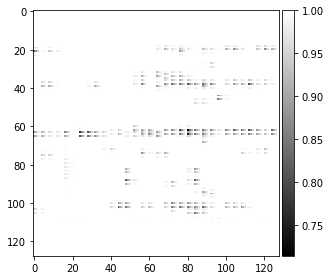

In [6]:
# Toon afbeelding
#-----------------------------------------------
#-----------------------------------------------
index = 6   
#-----------------------------------------------
#-----------------------------------------------

imshow(X_train[index].reshape((128,128)),cmap='gray')

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import itertools
import os
import random
import matplotlib.pyplot as plt
%matplotlib inline


In [18]:
# Neural network parameters


model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(128,128,2)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax')
])

model.summary()

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 128, 128, 32)      608       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 65536)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 131074    
Total params: 150,178
Trainable params: 150,178
Non-trainable params: 0
________________________________________________

In [13]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

model = models.Sequential()
model.add(layers.Conv2D(32, (9, 9), activation='relu', input_shape=(128, 128, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [14]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
batch_size = 10 

model.fit(X_train, y_train, epochs=70, validation_data=(X_test, y_test))

Epoch 1/70


ValueError: in user code:

    /home/bit/.local/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /home/bit/.local/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/bit/.local/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/bit/.local/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/bit/.local/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/bit/.local/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /home/bit/.local/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:754 train_step
        y_pred = self(x, training=True)
    /home/bit/.local/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /home/bit/.local/lib/python3.6/site-packages/tensorflow/python/keras/engine/input_spec.py:259 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer sequential_3 is incompatible with the layer: expected axis -1 of input shape to have value 2 but received input with shape (None, 128, 128, 1)


In [ ]:
# Accuray 
plt.plot(history.history['accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# Loss 
plt.plot(history.history['loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Performantie op de test data

y_pred = model.predict_classes(X_test)
print('\n')
print('accuracy score:', accuracy_score(y_test, y_pred) * 100) 
print('\n')
print(classification_report(y_test, y_pred))
cf = confusion_matrix(y_test, y_pred)
print(cf)

CNN vb sklearn

In [20]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(8, 2), random_state=10)

clf.fit(X_train, y_train)
MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

ValueError: Found array with dim 4. Estimator expected <= 2.

In [ ]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

Random Forest

In [21]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn import linear_model, datasets
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree



In [22]:
# Random Forest Classifier
X_train,y_train = load_X_if_matched_in_y(filenames_X_train, y)
X_test, y_test = load_X_if_matched_in_y(filenames_X_test, y)

number_of_trees = 1000
max_number_of_features = 2

#Maken van het model
RFCmodel = RandomForestClassifier(n_estimators=number_of_trees, max_features=max_number_of_features)

#Trainen van het model
RFCmodel.fit(X_train,y_train)

#Hoe belangrijk is elke feature voor het model (0.22 en 0.15 zullen dan degene zijn die gebruikt worden aangezien je slecht 2 features gebruikt hier)
print(RFCmodel.feature_importances_)

[0. 0. 0. ... 0. 0. 0.]


In [23]:
# Test Random Forest Classifier

y_pred = RFCmodel.predict(X_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\naccuracy")
print(accuracy_score(y_test, y_pred) * 100) 

              precision    recall  f1-score   support

       FOUND       0.86      0.93      0.89       769
   NOT_FOUND       0.83      0.70      0.76       386

    accuracy                           0.85      1155
   macro avg       0.85      0.81      0.83      1155
weighted avg       0.85      0.85      0.85      1155

[[714  55]
 [116 270]]

accuracy
85.19480519480518


In [ ]:
clf_adaboost = AdaBoostClassifier(n_estimators=150,learning_rate=0.9)
clf_adaboost.fit(X_train,y_train)

y_pred = clf_adaboost.predict(X_test)

print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 